<div align="center">

  <a href="https://ultralytics.com/yolov5" target="_blank">
    <img width="1024", src="https://raw.githubusercontent.com/ultralytics/assets/main/yolov5/v70/splash.png"></a>


<br>
  <a href="https://bit.ly/yolov5-paperspace-notebook"><img src="https://assets.paperspace.io/img/gradient-badge.svg" alt="Run on Gradient"></a>
  <a href="https://colab.research.google.com/github/ultralytics/yolov5/blob/master/tutorial.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>
  <a href="https://www.kaggle.com/ultralytics/yolov5"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open In Kaggle"></a>
<br>

This <a href="https://github.com/ultralytics/yolov5">YOLOv5</a> 🚀 notebook by <a href="https://ultralytics.com">Ultralytics</a> presents simple train, validate and predict examples to help start your AI adventure.<br>We hope that the resources in this notebook will help you get the most out of YOLOv5. Please browse the YOLOv5 <a href="https://docs.ultralytics.com/yolov5">Docs</a> for details, raise an issue on <a href="https://github.com/ultralytics/yolov5">GitHub</a> for support, and join our <a href="https://discord.gg/n6cFeSPZdD">Discord</a> community for questions and discussions!

</div>

# Setup

Clone GitHub [repository](https://github.com/ultralytics/yolov5), install [dependencies](https://github.com/ultralytics/yolov5/blob/master/requirements.txt) and check PyTorch and GPU.

In [3]:



import utils
display = utils.notebook_init()  # checks

NameError: name 'utils' is not defined

In [ ]:
!unzip /content/train_data.zip

# 1. Detect

`detect.py` runs YOLOv5 inference on a variety of sources, downloading models automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases), and saving results to `runs/detect`. Example inference sources are:

```shell
python detect.py --source 0  # webcam
                          img.jpg  # image 
                          vid.mp4  # video
                          screen  # screenshot
                          path/  # directory
                         'path/*.jpg'  # glob
                         'https://youtu.be/Zgi9g1ksQHc'  # YouTube
                         'rtsp://example.com/media.mp4'  # RTSP, RTMP, HTTP stream
```

# Checking Front Tested Images

In [15]:
#check on individual images for 
#For model loading 'https://docs.ultralytics.com/yolov5/tutorials/pytorch_hub_model_loading/'

import torch

# Model
model = torch.hub.load('ultralytics/yolov5', 'custom', r'C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\newest.pt')  # custom trained model
model.conf = 0.6
model.agnostic = True #Non-max suppression
model.iou = 0.3
model.max_det = 14
# Image
im = r'C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\yolov5\0.jpg'

# Inference
results = model(im)
# results.show()
result = results.pandas().xyxy[0].sort_values('xmin') 


Using cache found in C:\Users\v23ASayed2/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-8-28 Python-3.11.0 torch-2.0.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7037095 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [16]:
print(result)

           xmin        ymin         xmax        ymax  confidence  class  name
2    697.324219  810.401245   753.697021  880.156433    0.928635      2     3
11   783.312744  840.165649   819.653748  873.921082    0.903974      9     0
1    831.107605  816.150574   881.309082  881.706909    0.934442      1     2
13   914.229370  841.016357   950.540588  875.995361    0.903453      9     0
8    963.437622  819.447205  1007.160522  882.295654    0.911214      0     1
5   1037.506470  816.630188  1091.503662  883.491943    0.921071      2     3
12  1096.666748  843.051514  1134.047974  877.621277    0.903794      9     0
6   1173.023560  842.798706  1211.665283  878.997375    0.920185      9     0
3   1222.814941  823.154663  1269.265747  886.147583    0.927403      3     4
9   1304.120605  844.575256  1341.554443  879.414490    0.906089      9     0
7   1356.481079  846.031128  1393.404175  880.799683    0.911963      9     0
10  1407.717041  846.023193  1445.112671  881.174438    0.905590

# CER Function

In [6]:
#CER function
from datasets import load_metric
cer_metric = load_metric("cer", revision="master")
def compute_cer(pred_ids, label_ids):
    cer = cer_metric.compute(predictions=pred_ids, references=label_ids)
    return cer

ModuleNotFoundError: No module named 'datasets'

# Calculating CER and Handling Scanning and Model output issues.

In [ ]:
import os
import shutil
import torch
import pandas as pd
from datasets import load_metric
import cv2

# Model
model = torch.hub.load('ultralytics/yolov5', 'custom', 'newest.pt')  # custom trained model
model.conf = 0.6
model.agnostic = True #Non-max Suppression.
model.iou = 0.3
model.max_det = 14
# Set the input and output directories
input_dir = r'C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\batch_2_testing\Frontscan_batch_2' #Front scanned IDs.
excel_file_path = r'C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\batch_2_testing\national_ids_batch_2.xlsx'  # Table containing ground truth IDs.
mapped_ids_dir = r'C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\batch_2_testing\mapped_ids' #Saving IDs that have mobile number in the table.
problem_dir = r'C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\batch_2_testing\problem' #Save images that doesnt output any numbers from the model.
high_cer_dir = r'C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\batch_2_testing\high_cer'  # saving high CER images.
long_prediction_dir = r'C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\batch_2_testing\long_predictions'  # saving images that outputs more than 14 number from the model.
not_found_file = r'C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\batch_2_testing\not_found_mobiles.txt' #saving mobile numbers that are not found in the table.
output_dir = r'C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\batch_2_testing\outputs' #text files of the extracted IDs
cer_0_dir = r'C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\batch_2_testing\CER_0' #saving images with CER 0 for annotation
cer_7_dir = r'C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\batch_2_testing\cer_7'  # saving images with CER of 7.14%
cer_14_dir = r'C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\batch_2_testing\cer_14' # saving images with CER of 14.29%
miss_annotated_dir = r'C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\batch_2_testing\miss_annotated' #directory for miss-annotated images
# Load the Excel file into a pandas DataFrame
df = pd.read_excel(excel_file_path)

# Initialize variables for total number of errors and total length of national ID number across all text files
total_errors = 0
index = 0 # Number of IDs


# Load the CER metric using the datasets library
# cer_metric = load_metric("cer", revision="master")

# Loop through all images in the input directory
for filename in os.listdir(input_dir):
    # Check if the file is an image
    if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
        # Extract the mobile number from the filename
        parts = filename.split('_')
        phone_number_part = parts[-2]
        mobile_number = int(phone_number_part[-10:])  # convert the mobile number to an integer
        
        # Check if the mobile number is in the Excel file
        if mobile_number not in df['msisdn'].values:
            # If mobile number not found, save it to the "not found" file
            with open(not_found_file, 'a') as f:
                f.write(str(mobile_number) + '\n')
            print(f"Added mobile number {mobile_number} to {not_found_file}")  
            continue 

        filtered_df = df.loc[df['msisdn'] == mobile_number, 'id_number']
        if filtered_df.empty:
            print(f"No matching id number found for mobile number {mobile_number} in the Excel file")
            continue

        id_number_str = filtered_df.values[0] #IDs got from the table

        if pd.isna(id_number_str):
            print(f"The id number for mobile number {mobile_number} is NaN in the Excel file")
            continue

        # Convert the ID number to a list of integers
        id_number = int(id_number_str)
        
        # Load the image
        image_path = os.path.join(input_dir, filename)
        img = cv2.imread(image_path)
        
        # Perform inference
        results = model(image_path)
        result = results.pandas().xyxy[0].sort_values('xmin') 
        extracted_ids = result['name']  
        numbers = result['name']
        output_path = os.path.join(output_dir, f'{filename}.txt')
        with open(output_path, 'w') as f:
            for number in numbers:
                f.write(str(number))
        # If the Scanned image doesn't output any number from the model, save the image to the problem directory and continue to the next image
        if extracted_ids.empty:
            problem_path = os.path.join(problem_dir, filename)
            cv2.imwrite(problem_path, img)
            print(f"Saved image {filename} with no output numbers to {problem_dir}")
            continue
        
        extracted_ids = "".join([str(num) for num in extracted_ids])
        extracted_ids = int(extracted_ids)
        mapped_ids_path = os.path.join(mapped_ids_dir, filename)
        cv2.imwrite(mapped_ids_path, img)
        # If the extracted ID has more than 14 digits, save the image to the long prediction folder and skip the rest of the loop
        if len(str(extracted_ids)) > 14:
            shutil.copy(image_path, os.path.join(long_prediction_dir, filename))
            print(f"Saved file {filename} with long prediction to {long_prediction_dir}")


        # Calculate the CER between the reference ID number and the extracted IDs
        cer_value = cer_metric.compute(predictions=[extracted_ids], references=[id_number])
        print(f"CER for {filename}: {cer_value:.2%}")
        # If the CER is greater than 14.29%, save the image to the high CER folder
        if cer_value > 0.1429:
            # Check if the image outputs exactly 14 numbers
            if len(numbers) == 14:
                # Save the image to the miss_annotated folder
                shutil.copy(image_path, os.path.join(miss_annotated_dir, filename))
                print(f"Saved image {filename} to miss_annotated folder")
                continue  # Skip further processing for this image
            
            # Save the image to the high_cer folder
            shutil.copy(image_path, os.path.join(high_cer_dir, filename))
            print(f"Saved image {filename} with high CER to {high_cer_dir}")
        # Save the image to its respective CER folder
        elif cer_value == 0:
            shutil.copy(image_path, cer_0_dir)
            print(f"CER of {cer_value} for image {filename}. Image saved to {cer_0_dir}")
        elif cer_value > 0.070 and cer_value < 0.072:
            shutil.copy(image_path, cer_7_dir)
            print(f"CER of {cer_value} for image {filename}. Image saved to {cer_7_dir}")
        elif cer_value > 0.13 and cer_value < 0.15 :
            shutil.copy(image_path, cer_14_dir)
            print(f"CER of {cer_value} for image {filename}. Image saved to {cer_14_dir}")

        
        # Save the extracted ID to the mapped IDs directory

        total_errors += cer_value
        index += 1
# Calculate the average CER
total_errors = total_errors                                        
average_cer = total_errors / index
print(f"Average CER: {average_cer:.2%}")

# Print a message indicating the number of files with long predictions that were saved
num_long_predictions = len(os.listdir(long_prediction_dir))
if num_long_predictions > 0:
    print(f"Saved {num_long_predictions} files with long predictions to {long_prediction_dir}")
else:
    print("No files with long predictions were found")

# Print a message indicating the number of files saved to the high CER directory
num_high_cer = len(os.listdir(high_cer_dir))
if num_high_cer > 0:
    print(f"Saved {num_high_cer} images with high CER to {high_cer_dir}")
else:
    print("No images with high CER were found")

# Print a message indicating the number of IDs that were successfully mapped
print(f"Successfully mapped {index} IDs")


In [ ]:
!python detect.py --weights best.pt --save-txt  --conf-thres 0.6   --img 640  --source front_IDs 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<img align="left" src="https://user-images.githubusercontent.com/26833433/127574988-6a558aa1-d268-44b9-bf6b-62d4c605cc72.jpg" width="600">

# 2. Validate
Validate a model's accuracy on the [COCO](https://cocodataset.org/#home) dataset's `val` or `test` splits. Models are downloaded automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases). To show results by class use the `--verbose` flag.

In [ ]:
# Download COCO val
torch.hub.download_url_to_file('https://ultralytics.com/assets/coco2017val.zip', 'tmp.zip')  # download (780M - 5000 images)
!unzip -q tmp.zip -d ../datasets && rm tmp.zip  # unzip

In [ ]:
# Validate YOLOv5 model on custom val dataset
!python val.py --weights yolov5s.pt --data coco.yaml --img 640 --half

# 3. Train

<p align=""><a href="https://bit.ly/ultralytics_hub"><img width="1000" src="https://github.com/ultralytics/assets/raw/main/im/integrations-loop.png"/></a></p>
Close the active learning loop by sampling images from your inference conditions with the `roboflow` pip package
<br><br>

Train a YOLOv5s model on the [COCO128](https://www.kaggle.com/ultralytics/coco128) dataset with `--data coco128.yaml`, starting from pretrained `--weights yolov5s.pt`, or from randomly initialized `--weights '' --cfg yolov5s.yaml`.

- **Pretrained [Models](https://github.com/ultralytics/yolov5/tree/master/models)** are downloaded
automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases)
- **[Datasets](https://github.com/ultralytics/yolov5/tree/master/data)** available for autodownload include: [COCO](https://github.com/ultralytics/yolov5/blob/master/data/coco.yaml), [COCO128](https://github.com/ultralytics/yolov5/blob/master/data/coco128.yaml), [VOC](https://github.com/ultralytics/yolov5/blob/master/data/VOC.yaml), [Argoverse](https://github.com/ultralytics/yolov5/blob/master/data/Argoverse.yaml), [VisDrone](https://github.com/ultralytics/yolov5/blob/master/data/VisDrone.yaml), [GlobalWheat](https://github.com/ultralytics/yolov5/blob/master/data/GlobalWheat2020.yaml), [xView](https://github.com/ultralytics/yolov5/blob/master/data/xView.yaml), [Objects365](https://github.com/ultralytics/yolov5/blob/master/data/Objects365.yaml), [SKU-110K](https://github.com/ultralytics/yolov5/blob/master/data/SKU-110K.yaml).
- **Training Results** are saved to `runs/train/` with incrementing run directories, i.e. `runs/train/exp2`, `runs/train/exp3` etc.
<br>

A **Mosaic Dataloader** is used for training which combines 4 images into 1 mosaic.

## Label a dataset on Roboflow (optional)

[Roboflow](https://roboflow.com/?ref=ultralytics) enables you to easily **organize, label, and prepare** a high quality dataset with your own custom data. Roboflow also makes it easy to establish an active learning pipeline, collaborate with your team on dataset improvement, and integrate directly into your model building workflow with the `roboflow` pip package.

In [ ]:
#@title Select YOLOv5 🚀 logger {run: 'auto'}
logger = 'Comet' #@param ['Comet', 'ClearML', 'TensorBoard']

if logger == 'Comet':
  %pip install -q comet_ml
  import comet_ml; comet_ml.init()
elif logger == 'ClearML':
  %pip install -q clearml
  import clearml; clearml.browser_login()
elif logger == 'TensorBoard':
  %load_ext tensorboard
  %tensorboard --logdir runs/train

In [ ]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [ ]:
# Train YOLOv5s on COCO128 for 3 epochs
!python yolov5/train.py --img 640 --batch 8 --epochs 200 --data yolov5/data/custom_data.yaml --weights yolov5/best.pt --device cpu --cache

# 4. Visualize

## Comet Logging and Visualization 🌟 NEW

[Comet](https://www.comet.com/site/lp/yolov5-with-comet/?utm_source=yolov5&utm_medium=partner&utm_campaign=partner_yolov5_2022&utm_content=yolov5_colab) is now fully integrated with YOLOv5. Track and visualize model metrics in real time, save your hyperparameters, datasets, and model checkpoints, and visualize your model predictions with [Comet Custom Panels](https://www.comet.com/docs/v2/guides/comet-dashboard/code-panels/about-panels/?utm_source=yolov5&utm_medium=partner&utm_campaign=partner_yolov5_2022&utm_content=yolov5_colab)! Comet makes sure you never lose track of your work and makes it easy to share results and collaborate across teams of all sizes!

Getting started is easy:
```shell
pip install comet_ml  # 1. install
export COMET_API_KEY=<Your API Key>  # 2. paste API key
python train.py --img 640 --epochs 3 --data coco128.yaml --weights yolov5s.pt  # 3. train
```
To learn more about all of the supported Comet features for this integration, check out the [Comet Tutorial](https://docs.ultralytics.com/yolov5/tutorials/comet_logging_integration). If you'd like to learn more about Comet, head over to our [documentation](https://www.comet.com/docs/v2/?utm_source=yolov5&utm_medium=partner&utm_campaign=partner_yolov5_2022&utm_content=yolov5_colab). Get started by trying out the Comet Colab Notebook:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1RG0WOQyxlDlo5Km8GogJpIEJlg_5lyYO?usp=sharing)

<a href="https://bit.ly/yolov5-readme-comet2">
<img alt="Comet Dashboard" src="https://user-images.githubusercontent.com/26833433/202851203-164e94e1-2238-46dd-91f8-de020e9d6b41.png" width="1280"/></a>

## ClearML Logging and Automation 🌟 NEW

[ClearML](https://cutt.ly/yolov5-notebook-clearml) is completely integrated into YOLOv5 to track your experimentation, manage dataset versions and even remotely execute training runs. To enable ClearML (check cells above):

- `pip install clearml`
- run `clearml-init` to connect to a ClearML server (**deploy your own [open-source server](https://github.com/allegroai/clearml-server)**, or use our [free hosted server](https://cutt.ly/yolov5-notebook-clearml))

You'll get all the great expected features from an experiment manager: live updates, model upload, experiment comparison etc. but ClearML also tracks uncommitted changes and installed packages for example. Thanks to that ClearML Tasks (which is what we call experiments) are also reproducible on different machines! With only 1 extra line, we can schedule a YOLOv5 training task on a queue to be executed by any number of ClearML Agents (workers).

You can use ClearML Data to version your dataset and then pass it to YOLOv5 simply using its unique ID. This will help you keep track of your data without adding extra hassle. Explore the [ClearML Tutorial](https://docs.ultralytics.com/yolov5/tutorials/clearml_logging_integration) for details!

<a href="https://cutt.ly/yolov5-notebook-clearml">
<img alt="ClearML Experiment Management UI" src="https://github.com/thepycoder/clearml_screenshots/raw/main/scalars.jpg" width="1280"/></a>

## Local Logging

Training results are automatically logged with [Tensorboard](https://www.tensorflow.org/tensorboard) and [CSV](https://github.com/ultralytics/yolov5/pull/4148) loggers to `runs/train`, with a new experiment directory created for each new training as `runs/train/exp2`, `runs/train/exp3`, etc.

This directory contains train and val statistics, mosaics, labels, predictions and augmentated mosaics, as well as metrics and charts including precision-recall (PR) curves and confusion matrices. 

<img alt="Local logging results" src="https://user-images.githubusercontent.com/26833433/183222430-e1abd1b7-782c-4cde-b04d-ad52926bf818.jpg" width="1280"/>


# Environments

YOLOv5 may be run in any of the following up-to-date verified environments (with all dependencies including [CUDA](https://developer.nvidia.com/cuda)/[CUDNN](https://developer.nvidia.com/cudnn), [Python](https://www.python.org/) and [PyTorch](https://pytorch.org/) preinstalled):

- **Notebooks** with free GPU: <a href="https://bit.ly/yolov5-paperspace-notebook"><img src="https://assets.paperspace.io/img/gradient-badge.svg" alt="Run on Gradient"></a> <a href="https://colab.research.google.com/github/ultralytics/yolov5/blob/master/tutorial.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a> <a href="https://www.kaggle.com/ultralytics/yolov5"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open In Kaggle"></a>
- **Google Cloud** Deep Learning VM. See [GCP Quickstart Guide](https://docs.ultralytics.com/yolov5/environments/google_cloud_quickstart_tutorial/)
- **Amazon** Deep Learning AMI. See [AWS Quickstart Guide](https://docs.ultralytics.com/yolov5/environments/aws_quickstart_tutorial/)
- **Docker Image**. See [Docker Quickstart Guide](https://docs.ultralytics.com/yolov5/environments/docker_image_quickstart_tutorial/) <a href="https://hub.docker.com/r/ultralytics/yolov5"><img src="https://img.shields.io/docker/pulls/ultralytics/yolov5?logo=docker" alt="Docker Pulls"></a>


# Status

![YOLOv5 CI](https://github.com/ultralytics/yolov5/actions/workflows/ci-testing.yml/badge.svg)

If this badge is green, all [YOLOv5 GitHub Actions](https://github.com/ultralytics/yolov5/actions) Continuous Integration (CI) tests are currently passing. CI tests verify correct operation of YOLOv5 training ([train.py](https://github.com/ultralytics/yolov5/blob/master/train.py)), testing ([val.py](https://github.com/ultralytics/yolov5/blob/master/val.py)), inference ([detect.py](https://github.com/ultralytics/yolov5/blob/master/detect.py)) and export ([export.py](https://github.com/ultralytics/yolov5/blob/master/export.py)) on macOS, Windows, and Ubuntu every 24 hours and on every commit.


# Appendix

Additional content below.

In [ ]:
# YOLOv5 PyTorch HUB Inference (DetectionModels only)
import torch

model = torch.hub.load('ultralytics/yolov5', 'yolov5s', force_reload=True)  # yolov5n - yolov5x6 or custom
im = 'https://ultralytics.com/images/zidane.jpg'  # file, Path, PIL.Image, OpenCV, nparray, list
results = model(im)  # inference
results.print()  # or .show(), .save(), .crop(), .pandas(), etc.

# Checking Back Tested Images

Using cache found in C:\Users\v23ASayed2/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-8-28 Python-3.11.0 torch-2.0.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7037095 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


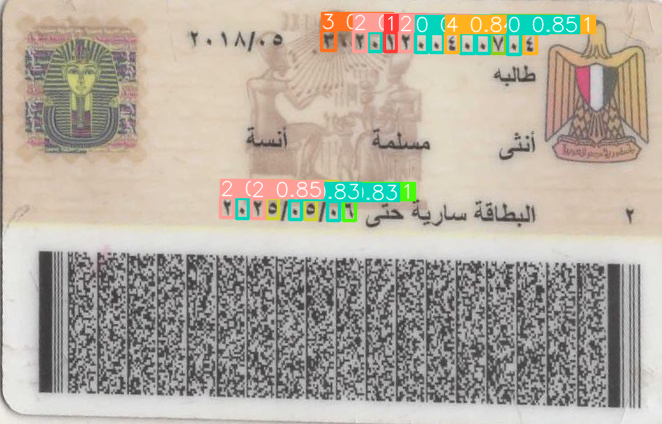

In [37]:
#check on individual images for 
#For model loading 'https://docs.ultralytics.com/yolov5/tutorials/pytorch_hub_model_loading/'

import torch

# Model
model = torch.hub.load('ultralytics/yolov5', 'custom', r'C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\back_model.pt')  # custom trained model
model.conf = 0.6
model.agnostic = True #Non-max suppression
model.iou = 0.3
model.max_det = 22
# Image
im = r'C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\back_testing\CER_14\202212_C_2021011_733_01012496450_2.jpg'

# Inference
results = model(im)
results.show()
results = results.pandas().xyxy[0]
image_height = results['ymax'].max()  # Assuming 'ymax' represents the height of the image
midpoint_y = image_height / 2
# Filter the DataFrame to select boxes in the top half
top_half_boxes = results[results['ymin'] < midpoint_y]
# Count the number of boxes in the top half
num_boxes_in_top_half = len(top_half_boxes)
ID_number = results.sort_values('ymin')[:num_boxes_in_top_half]
ID_sorted = ID_number.sort_values('xmin')
expiry_date = results.sort_values('ymin')[num_boxes_in_top_half:]
expiry_date_sorted = expiry_date.sort_values('xmin')

In [ ]:
print(expiry_date_sorted['name'])

# Checking the CER of the ID in the back 

In [6]:
import os
import shutil
import torch
import pandas as pd
from datasets import load_metric
import cv2

# Model
model = torch.hub.load('ultralytics/yolov5', 'custom', 'back_model.pt')  # custom trained model
model.conf = 0.6
model.agnostic = True #Non-max Suppression.
model.iou = 0.3
model.max_det = 22
# Set the input and output directories
input_dir = r'C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\back_testing\scanned_back' #Front scanned IDs.
excel_file_path = r'C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\back_testing\national_id_info_df.xlsx'  # Table containing ground truth IDs.
mapped_ids_dir = r'C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\back_testing\mapped_ids' #Saving IDs that have mobile number in the table.
problem_dir = r'C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\back_testing\problem' #Save images that doesnt output any numbers from the model.
high_cer_dir = r'C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\back_testing\high_cer'  # saving high CER images.
long_prediction_dir = r'C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\back_testing\long_predictions'  # saving images that outputs more than 14 number from the model.
not_found_file = r'C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\back_testing\not_found_mobiles.txt' #saving mobile numbers that are not found in the table.
output_dir = r'C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\back_testing\outputs' #text files of the extracted IDs
cer_0_dir = r'C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\back_testing\CER_0' #saving images with CER 0 for annotation
cer_7_dir = r'C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\back_testing\cer_7'  # saving images with CER of 7.14%
cer_14_dir = r'C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\back_testing\cer_14' # saving images with CER of 14.29%
miss_annotated_dir = r'C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\back_testing\miss_annotated' #directory for miss-annotated images
# Load the Excel file into a pandas DataFrame
df = pd.read_excel(excel_file_path)

# Initialize variables for total number of errors and total length of national ID number across all text files
total_errors = 0
index = 0 # Number of IDs


# Load the CER metric using the datasets library
# cer_metric = load_metric("cer", revision="master")

# Loop through all images in the input directory
for filename in os.listdir(input_dir):
    # Check if the file is an image
    if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
        # Extract the mobile number from the filename
        parts = filename.split('_')
        phone_number_part = parts[-2]
        mobile_number = int(phone_number_part[-10:])  # convert the mobile number to an integer
        
        # Check if the mobile number is in the Excel file
        if mobile_number not in df['msisdn'].values:
            # If mobile number not found, save it to the "not found" file
            with open(not_found_file, 'a') as f:
                f.write(str(mobile_number) + '\n')
            print(f"Added mobile number {mobile_number} to {not_found_file}")  
            continue 

        filtered_df = df.loc[df['msisdn'] == mobile_number, 'id_number']
        if filtered_df.empty:
            print(f"No matching id number found for mobile number {mobile_number} in the Excel file")
            continue

        id_number_str = filtered_df.values[0] #IDs got from the table

        if pd.isna(id_number_str):
            print(f"The id number for mobile number {mobile_number} is NaN in the Excel file")
            continue

        # Convert the ID number to a list of integers
        id_number = int(id_number_str)
        
        # Load the image
        image_path = os.path.join(input_dir, filename)
        img = cv2.imread(image_path)
        
        # Perform inference
        results = model(image_path)
        results = results.pandas().xyxy[0]
        image_height = results['ymax'].max()  # Assuming 'ymax' represents the height of the image
        midpoint_y = image_height / 2
        # Filter the DataFrame to select boxes in the top half
        top_half_boxes = results[results['ymin'] < midpoint_y]
        # Count the number of boxes in the top half
        num_boxes_in_top_half = len(top_half_boxes)
        ID_number = results.sort_values('ymin')[:num_boxes_in_top_half]
        ID_sorted = ID_number.sort_values('xmin')
        extracted_ids = ID_sorted['name']  
        numbers = ID_sorted['name']
        output_path = os.path.join(output_dir, f'{filename}.txt')
        with open(output_path, 'w') as f:
            for number in numbers:
                f.write(str(number))
        # If the Scanned image doesn't output any number from the model, save the image to the problem directory and continue to the next image
        if extracted_ids.empty:
            problem_path = os.path.join(problem_dir, filename)
            cv2.imwrite(problem_path, img)
            print(f"Saved image {filename} with no output numbers to {problem_dir}")
            continue
        
        extracted_ids = "".join([str(num) for num in extracted_ids])
        extracted_ids = int(extracted_ids)
        print(type(extracted_ids))
        print(type(id_number))
        mapped_ids_path = os.path.join(mapped_ids_dir, filename)
        cv2.imwrite(mapped_ids_path, img)
        # If the extracted ID has more than 14 digits, save the image to the long prediction folder and skip the rest of the loop
        if len(str(extracted_ids)) > 14:
            shutil.copy(image_path, os.path.join(long_prediction_dir, filename))
            print(f"Saved file {filename} with long prediction to {long_prediction_dir}")


        # Calculate the CER between the reference ID number and the extracted IDs
        cer_value = cer_metric.compute(predictions=[extracted_ids], references=[id_number])
        print(f"CER for {filename}: {cer_value:.2%}")
        # If the CER is greater than 14.29%, save the image to the high CER folder
        if cer_value > 0.1429:
            # Check if the image outputs exactly 14 numbers
            if len(numbers) == 14:
                # Save the image to the miss_annotated folder
                shutil.copy(image_path, os.path.join(miss_annotated_dir, filename))
                print(f"Saved image {filename} to miss_annotated folder")
                continue  # Skip further processing for this image
            
            # Save the image to the high_cer folder
            shutil.copy(image_path, os.path.join(high_cer_dir, filename))
            print(f"Saved image {filename} with high CER to {high_cer_dir}")
        # Save the image to its respective CER folder
        elif cer_value == 0:
            shutil.copy(image_path, cer_0_dir)
            print(f"CER of {cer_value} for image {filename}. Image saved to {cer_0_dir}")
        elif cer_value > 0.070 and cer_value < 0.072:
            shutil.copy(image_path, cer_7_dir)
            print(f"CER of {cer_value} for image {filename}. Image saved to {cer_7_dir}")
        elif cer_value > 0.13 and cer_value < 0.15 :
            shutil.copy(image_path, cer_14_dir)
            print(f"CER of {cer_value} for image {filename}. Image saved to {cer_14_dir}")

        
        # Save the extracted ID to the mapped IDs directory

        total_errors += cer_value
        index += 1
# Calculate the average CER
total_errors = total_errors                                        
average_cer = total_errors / index
print(f"Average CER: {average_cer:.2%}")

# Print a message indicating the number of files with long predictions that were saved
num_long_predictions = len(os.listdir(long_prediction_dir))
if num_long_predictions > 0:
    print(f"Saved {num_long_predictions} files with long predictions to {long_prediction_dir}")
else:
    print("No files with long predictions were found")

# Print a message indicating the number of files saved to the high CER directory
num_high_cer = len(os.listdir(high_cer_dir))
if num_high_cer > 0:
    print(f"Saved {num_high_cer} images with high CER to {high_cer_dir}")
else:
    print("No images with high CER were found")

# Print a message indicating the number of IDs that were successfully mapped
print(f"Successfully mapped {index} IDs")


Using cache found in C:\Users\v23ASayed2/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-9-24 Python-3.11.0 torch-2.0.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7037095 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


<class 'int'>
<class 'int'>
CER for 202212_C_2021011_1000_01097352778_2.jpg: 0.00%
CER of 0.0 for image 202212_C_2021011_1000_01097352778_2.jpg. Image saved to C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\back_testing\CER_0
<class 'int'>
<class 'int'>
CER for 202212_C_2021011_1001_01065775706_2.jpg: 0.00%
CER of 0.0 for image 202212_C_2021011_1001_01065775706_2.jpg. Image saved to C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\back_testing\CER_0
<class 'int'>
<class 'int'>
CER for 202212_C_2021011_1002_01067038985_2.jpg: 0.00%
CER of 0.0 for image 202212_C_2021011_1002_01067038985_2.jpg. Image saved to C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\back_testing\CER_0
<class 'int'>
<class 'int'>
CER for 202212_C_2021011_1004_01016977487_2.jpg: 0.00%
CER of 0.0 for image 202212_C_2021011_1004_01016977487_2.jpg. Image saved to C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\back_testing\CER_0
<class 'int'>
<class 'int'>
CER for 202212_C_2021011_1005_01026313741_2.jpg: 0.00%
CER of 0.0 for image 2022

KeyboardInterrupt: 

# Checking the expiry date from the back


In [4]:
import os
import shutil
import torch
import pandas as pd
from datasets import load_metric
import cv2

# Model
model = torch.hub.load('ultralytics/yolov5', 'custom', 'back_model.pt')  # custom trained model
model.conf = 0.6
model.agnostic = True #Non-max Suppression.
model.iou = 0.3
model.max_det = 22
# Set the input and output directories
input_dir = r'C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\back_testing\scanned_back' #Front scanned IDs.
excel_file_path = r'C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\back_testing\expiry_date.xlsx'  # Table containing ground truth IDs.
mapped_ids_dir = r'C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\back_testing\mapped_ids' #Saving IDs that have mobile number in the table.
problem_dir = r'C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\back_testing\problem' #Save images that doesnt output any numbers from the model.
high_cer_dir = r'C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\back_testing\high_cer'  # saving high CER images.
long_prediction_dir = r'C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\back_testing\long_predictions'  # saving images that outputs more than 14 number from the model.
not_found_file = r'C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\back_testing\not_found_mobiles.txt' #saving mobile numbers that are not found in the table.
output_dir = r'C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\back_testing\outputs' #text files of the extracted IDs
cer_0_dir = r'C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\back_testing\CER_0' #saving images with CER 0 for annotation
cer_7_dir = r'C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\back_testing\cer_7'  # saving images with CER of 7.14%
cer_14_dir = r'C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\back_testing\cer_14' # saving images with CER of 14.29%
miss_annotated_dir = r'C:\Users\v23ASayed2\Desktop\Vodafone\YOLOv5\back_testing\miss_annotated' #directory for miss-annotated images
# Load the Excel file into a pandas DataFrame
df = pd.read_excel(excel_file_path)

# Initialize variables for total number of errors and total length of national ID number across all text files
total_errors = 0
index = 0 # Number of IDs


# Load the CER metric using the datasets library
# cer_metric = load_metric("cer", revision="master")

# Loop through all images in the input directory
for filename in os.listdir(input_dir):
    # Check if the file is an image
    if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
        # Extract the mobile number from the filename
        parts = filename.split('_')
        phone_number_part = parts[-2]
        mobile_number = int(phone_number_part[-10:])  # convert the mobile number to an integer
        
        # Check if the mobile number is in the Excel file
        if mobile_number not in df['msisdn'].values:
            # If mobile number not found, save it to the "not found" file
            with open(not_found_file, 'a') as f:
                f.write(str(mobile_number) + '\n')
            print(f"Added mobile number {mobile_number} to {not_found_file}")  
            continue 

        filtered_df = df.loc[df['msisdn'] == mobile_number, 'expiry_date']
        if filtered_df.empty:
            print(f"No matching expiry date found for mobile number {mobile_number} in the Excel file")
            continue

        expiry_date_str = filtered_df.values[0] #IDs got from the table
        
        if pd.isna(expiry_date_str):
            print(f"The expiry date for mobile number {mobile_number} is NaN in the Excel file")
            continue

        # Convert the ID number to a list of integers
        expiry_date = int(expiry_date_str)
        
        # Load the image
        image_path = os.path.join(input_dir, filename)
        img = cv2.imread(image_path)
        
        # Perform inference
        results = model(image_path)
        results = results.pandas().xyxy[0]
        image_height = results['ymax'].max()  # Assuming 'ymax' represents the height of the image
        midpoint_y = image_height / 2
        # Filter the DataFrame to select boxes in the top half
        top_half_boxes = results[results['ymin'] < midpoint_y]
        # Count the number of boxes in the top half
        num_boxes_in_top_half = len(top_half_boxes)
        extracted_expiry_date = results.sort_values('ymin')[num_boxes_in_top_half:]
        extracted_expiry_date_sorted = extracted_expiry_date.sort_values('xmin')
        numbers = extracted_expiry_date_sorted['name']
        extracted_expiry_dates = extracted_expiry_date_sorted['name']
        output_path = os.path.join(output_dir, f'{filename}.txt')
        with open(output_path, 'w') as f:
            for number in numbers:
                f.write(str(number))
        # If the Scanned image doesn't output any number from the model, save the image to the problem directory and continue to the next image
        if extracted_expiry_dates.empty:
            problem_path = os.path.join(problem_dir, filename)
            cv2.imwrite(problem_path, img)
            print(f"Saved image {filename} with no output numbers to {problem_dir}")
            continue
        
        extracted_expiry_dates = "".join([str(num) for num in extracted_expiry_dates])
        extracted_expiry_dates = int(extracted_expiry_dates)
        print(type(extracted_expiry_dates))
        print(type(expiry_date))
        mapped_ids_path = os.path.join(mapped_ids_dir, filename)
        cv2.imwrite(mapped_ids_path, img)
        # If the extracted ID has more than 14 digits, save the image to the long prediction folder and skip the rest of the loop
        if len(str(extracted_expiry_dates)) > 14:
            shutil.copy(image_path, os.path.join(long_prediction_dir, filename))
            print(f"Saved file {filename} with long prediction to {long_prediction_dir}")


        # Calculate the CER between the reference ID number and the extracted IDs
        cer_value = cer_metric.compute(predictions=[extracted_expiry_dates], references=[expiry_date])
        print(f"CER for {filename}: {cer_value:.2%}")
        # If the CER is greater than 14.29%, save the image to the high CER folder
        if cer_value > 0.1429:
            # Check if the image outputs exactly 14 numbers
            if len(numbers) == 14:
                # Save the image to the miss_annotated folder
                shutil.copy(image_path, os.path.join(miss_annotated_dir, filename))
                print(f"Saved image {filename} to miss_annotated folder")
                continue  # Skip further processing for this image
            
            # Save the image to the high_cer folder
            shutil.copy(image_path, os.path.join(high_cer_dir, filename))
            print(f"Saved image {filename} with high CER to {high_cer_dir}")
        # Save the image to its respective CER folder
        elif cer_value == 0:
            shutil.copy(image_path, cer_0_dir)
            print(f"CER of {cer_value} for image {filename}. Image saved to {cer_0_dir}")
        elif cer_value > 0.070 and cer_value < 0.072:
            shutil.copy(image_path, cer_7_dir)
            print(f"CER of {cer_value} for image {filename}. Image saved to {cer_7_dir}")
        elif cer_value > 0.13 and cer_value < 0.15 :
            shutil.copy(image_path, cer_14_dir)
            print(f"CER of {cer_value} for image {filename}. Image saved to {cer_14_dir}")

        
        # Save the extracted ID to the mapped IDs directory

        total_errors += cer_value
        index += 1
# Calculate the average CER
total_errors = total_errors                                        
average_cer = total_errors / index
print(f"Average CER: {average_cer:.2%}")

# Print a message indicating the number of files with long predictions that were saved
num_long_predictions = len(os.listdir(long_prediction_dir))
if num_long_predictions > 0:
    print(f"Saved {num_long_predictions} files with long predictions to {long_prediction_dir}")
else:
    print("No files with long predictions were found")

# Print a message indicating the number of files saved to the high CER directory
num_high_cer = len(os.listdir(high_cer_dir))
if num_high_cer > 0:
    print(f"Saved {num_high_cer} images with high CER to {high_cer_dir}")
else:
    print("No images with high CER were found")

# Print a message indicating the number of IDs that were successfully mapped
print(f"Successfully mapped {index} expiry dates")


ModuleNotFoundError: No module named 'datasets'